## Movie Reviews Bayesian Classifier Project

### Dataset

Dataset containing 50,000 movie reviews from IMDb (Internet Movie Database). The dataset contains 25,000 positive reviews and 25,000 negative reviews. Dataset obtained from Kaggle at https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews.

Dataset contains the columns:

- review: The review that was written about a movie
- sentiment: Whether the review was positive or negative (values of 'positive' or 'negative')

##### Preprocessing

The review column often contained the HTML tag \<br />. This was removed from the datasets to reduce noise as they are irrelevant to the sentiment. 

Row 34813 could not have the HTML tag removed for some unknown reason (an Excel error occurred when attempted), so the row was removed entirely.

### Findings

From performing operations on this dataset, I have found that using Naive Bayes Classifiers is quite good at sentiment analysis of movie reviews. This can be seen in the accuracy score of 0.85. Across both positive and negative predictions, the model had a weighted average of 0.85 for precision, recall and f1 score. The precision number was slightly better for positive sentiment at 0.87 compared to the negative sentiment's 0.83, whereas the negative sentiment produced better results for both recall (0.88 - 0.82) and f1 score (0.85 - 0.84). The difference in f1 score informs us that the model is slightly more accurate when identifying negative sentiment.

When running the model using tfidf vectoriser instead of count vectoriser, the accuracy score goes up from 0.85 to 0.86. the other accuracy measurements all saw improvement as well except for the negative sentiment recall score which saw no change.

## Changelog

#### Version 1

- Read in dataset.
- Converted text data to number vector using count vectoriser.
- Added model using Naive Bayes Classifier.
- Split data into training and test data.
- Fit model to the data.
- Analysed accuracy of the model using accuracy measurements and confusion matrix.

#### Version 2

- Added tfidf vectoriser to convert text data to number vector.
- Made predictions on same data but using this method of conversion.
- Analysed results and compared to using count vectoriser.

In [43]:
# Import pandas for reading dataset

import pandas as pd

In [44]:
# Read dataset, print rows to check if it has worked

df = pd.read_csv('IMDBDataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [45]:
# Check for any rows with null values

print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [46]:
# Use vectoriser, a methodology of mapping words to a vector of real numbers
# Count vectoriser uses raw word counts found in the data

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectoriser
vectorizer = CountVectorizer()

# Fit and transform the text data
X_counts = vectorizer.fit_transform(df['review'])

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())


Feature names: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


In [47]:
# Display the shape of the vectoriser (x, y)
# The x value is the number of rows of data
# The y value is the number of unique words found in the dataset

print("CountVectorizer shape:", X_counts.shape)

CountVectorizer shape: (49999, 104088)


In [48]:
# Import libraries for splitting data, using Naive Bayes classifier, and displaying the results

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [49]:
# Split the data into training and test data, 20% test data, 80% training data
X_train, X_test, y_train, y_test = train_test_split(X_counts, df['sentiment'], test_size=0.2, random_state=42)

In [50]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train, y_train);

In [51]:
# Predict the sentiment for the test set
y_pred = model.predict(X_test)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      5001
    positive       0.87      0.82      0.84      4999

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



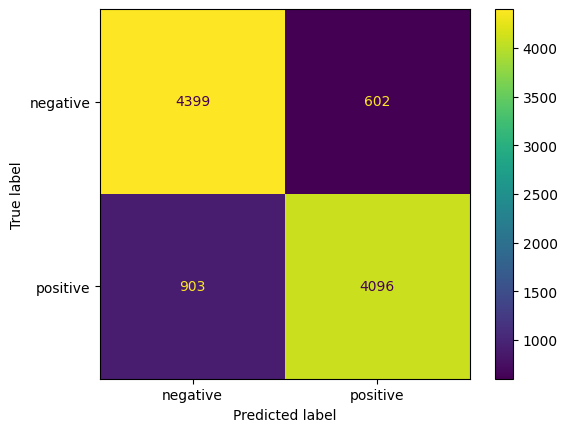

In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot(cmap='viridis');

In [ ]:
# Use tfidf vectoriser (Term Frequency - Inverse Document Frequency) to convert text to real number vector
# Tfidf vectoriser evaluates the importance of a word in a document relative to a collection of documents.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectoriser
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

# Display the feature names (vocabulary)
print("Feature names:", tfidf_vectorizer.get_feature_names_out())

Feature names: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


In [54]:
# Display the shape of the vectoriser (x, y)
# The x value is the number of rows of data
# The y value is the number of unique words found in the dataset

print("CountVectorizer shape:", X_tfidf.shape)

CountVectorizer shape: (49999, 104088)


In [55]:
# Split the data into training and test data, 20% test data, 80% training data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

In [56]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train, y_train);

In [57]:
# Predict the sentiment for the test set
y_pred = model.predict(X_test)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      5001
    positive       0.88      0.84      0.86      4999

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



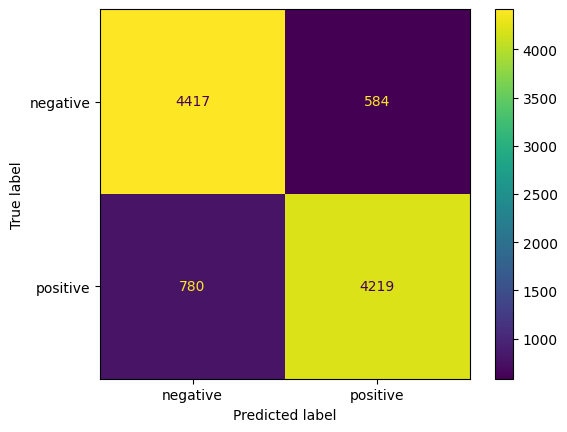

In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot(cmap='viridis');